## Using shapely to create and operate on geometries

Chris Prince [cmp670@nyu.edu]

October 2018

In [1]:
import geopandas as gpd
import shapely
from shapely.geometry import LineString, Point
%matplotlib inline

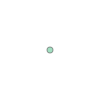

In [2]:
p = Point(20,30)
p

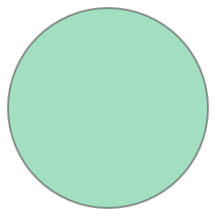

In [3]:
p.buffer(100)

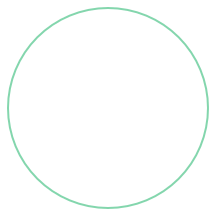

In [4]:
p.buffer(100).boundary

In [5]:
p.buffer(100).area

31365.48490545938

Note this isn't $\pi r^2$ because the buffer command creates a polygon, not a circle. To get a better approximation, use the `resolution` argument:

In [6]:
p.buffer(100, resolution=128).area

31415.13801144302

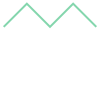

In [7]:
l = LineString([(0,0),(10,10),(20,0),(30,10),(40,0)])
l

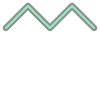

In [8]:
l.buffer(1)

In [9]:
p.to_wkt()

'POINT (20.0000000000000000 30.0000000000000000)'

In [10]:
df = gpd.GeoDataFrame(list(map(lambda x: [x.buffer(10).area, x.buffer(10)], [l,p])))

In [11]:
list(map(lambda x: [x.buffer(10).area, x.buffer(10)], [l,p]))

[[1380.2668357440148, <shapely.geometry.polygon.Polygon at 0x7f82db0562e8>],
 [313.6548490545939, <shapely.geometry.polygon.Polygon at 0x7f82db056358>]]

In [12]:
df.columns=["a","geometry"]

In [13]:
df

,a,geometry
0,1380.266836,"POLYGON ((2.928932188134525 17.07106781186548,..."
1,313.654849,"POLYGON ((30 30, 29.95184726672197 29.01982859..."


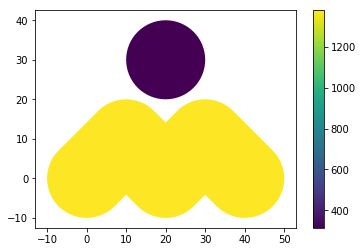

In [14]:
df.plot("a", legend=True)

In [15]:
[x.to_wkt() for x in [l,p]]

['LINESTRING (0.0000000000000000 0.0000000000000000, 10.0000000000000000 10.0000000000000000, 20.0000000000000000 0.0000000000000000, 30.0000000000000000 10.0000000000000000, 40.0000000000000000 0.0000000000000000)',
 'POINT (20.0000000000000000 30.0000000000000000)']

In [16]:
df = gpd.GeoDataFrame([[l.buffer(x).area, l.buffer(x).boundary] for x in range(1,10)], 
                      columns=["a","geometry"])

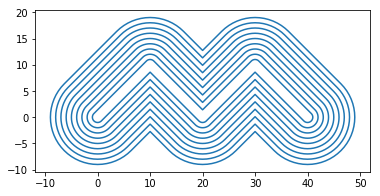

In [17]:
df.plot()

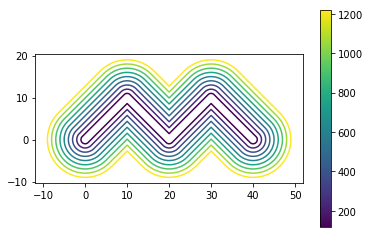

In [18]:
df.plot("a", legend=True)

In [19]:
shiftChevron = lambda d: shapely.ops.transform(lambda x,y: (x,y+d), l)

In [20]:
df = gpd.GeoDataFrame([[l.buffer(x).area, shiftChevron(15*x).buffer(x)] 
                       for x in range(1,10)], 
                      columns=["a","geometry"])

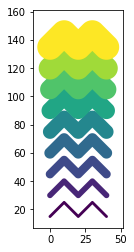

In [21]:
df.plot("a")

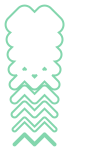

In [22]:
shapely.ops.unary_union(df.geometry).boundary #.to_wkt()

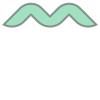

In [23]:
df.iloc[-1].geometry.intersection(df.iloc[-2].geometry)

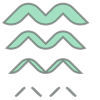

In [24]:
theIntersection = shapely.ops.unary_union([
                        df.iloc[i].geometry
                          .intersection(df.iloc[i+1].geometry) 
                        for i in range(df.shape[0]-1)])
theIntersection

In [25]:
len(list(theIntersection.geoms))

7

In [26]:
theIntersection.type

'MultiPolygon'